# TDSE 2d —— 含时薛定谔方程（二维）

## 一、背景

薛定谔方程：
$$
\mathrm{i}\hbar\frac{\partial}{\partial t} \phi = \mathcal{H} \phi
$$

其通解为：
$$
\phi(t) = \exp{\left( -\frac{\mathrm{i}}{\hbar}t \mathcal{H} \right)} \phi(0)
$$


所以求解薛定谔方程的关键就是求解哈密顿量 $\mathcal{H}$ 的指数

哈密顿量的矩阵很大：若在二维空间的某个正方形区域上求解，并离散化为 100`*`100 个格点，则态矢量将是 10000 维的，而相应地，哈密顿量将是 10000`*`10000 维的。如此大的矩阵不可能直接求解其指数。

求解微分方程的通用方法——龙格库塔方法——在这个问题上不太适用。因为波函数需要满足归一化条件：

$$
\int \phi^2 = 1
$$

而龙格库塔算法并不能维持这一条件，也就是说，随着时间的推移，波函数的模平方的积分不再是 1，可能增大或者减小。这对于量子力学来说是不可忍受的。因此我们需要其他算法。

## 二、Trotter-Suzuki 算法

Trotter-Suzuki 算法是一种求解薛定谔方程的算法。它的核心是利用下式：

$$
\exp(AB) \approx \exp(A)\exp(B)
$$

其中 A 和 B 是矩阵。满足约等号的条件为 A 和 B 都足够小。

因此，只要时间步长足够小，我们就可以将哈密顿量分解成很多个部分的和，这些部分的指数都可以解析地算出。例如下面这个矩阵的指数可以解析地算出：

$$
\exp \left[
\mathrm{i}*\tau
\begin{pmatrix}
0 & 1 \\
1 & 0 
\end{pmatrix}
\right]
=
\begin{pmatrix}
\cos{\tau} & \mathrm{i}\sin{\tau} \\
\mathrm{i}\sin{\tau} & \cos{\tau}
\end{pmatrix}
$$

上式也可以写成：

$$
\begin{aligned}
\newcommand{\e}{\mathrm{e}}
\exp[\mathrm{i}\tau(\e_0\e_1^T+\e_1\e_0^T)] &= \cos(\tau)(\e_0\e_0^T+\e_1\e_1^T)\\
&+\mathrm{i}\sin{\tau}(\e_0\e_1^T+\e_1\e_0^T)
\end{aligned}
$$

同理，二维哈密顿量可以写成像上式那样的多个部分的相加（省去推导的细节）：

$$
\newcommand{\e}{\mathrm{e}}
\newcommand{\phan}{\phantom{3}}
\begin{equation} \begin{split}
H &= \sum_{i=1}^{9} H_i, \\
H_1 &= \frac{1}{48\pi^2\delta^2}
\sum_{l=1,2,5,6,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l+2,n}^T+\e_{l+2,n}\e_{l,n}^T \right) ,\\
H_2 &= \frac{1}{48\pi^2\delta^2}
\sum_{l=3,4,7,8,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l+2,n}^T+\e_{l+2,n}\e_{l,n}^T \right) ,\\
H_3 &= \frac{-1}{\phan3\pi^2\delta^2}
\sum_{l=1,3,5,7,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l+1,n}^T+\e_{l+1,n}\e_{l,n}^T \right) ,\\
H_4 &= \frac{-1}{\phan3\pi^2\delta^2}
\sum_{l=2,4,6,8,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l+1,n}^T+\e_{l+1,n}\e_{l,n}^T \right) ,\\
H_5 &= \frac{1}{48\pi^2\delta^2}
\sum_{l=1,2,5,6,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l,n+2}^T+\e_{l+2,n}\e_{l,n+2}^T \right) ,\\
H_6 &= \frac{1}{48\pi^2\delta^2}
\sum_{l=3,4,7,8,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l,n+2}^T+\e_{l+2,n}\e_{l,n+2}^T \right) ,\\
H_7 &= \frac{-1}{\phan3\pi^2\delta^2}
\sum_{l=1,3,5,7,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l,n+1}^T+\e_{l,n+1}\e_{l,n}^T \right) ,\\
H_8 &= \frac{-1}{\phan3\pi^2\delta^2}
\sum_{l=2,4,6,8,\cdots}^{L_x}\sum_{n=1}^{L_y}
\left( \e_{l,n}\e_{l,n+1}^T+\e_{l,n+1}\e_{l,n}^T \right) ,\\
H_9 &= \frac{1}{48\pi^2\delta^2}
\sum_{l=1}^{L_x}\sum_{n=1}^{L_y}
\left( 60 + 48\pi^2\delta^2V_{l,n} \right)\e_{l,n}\e_{l,n}^T
\end{split} \label{eq:H9} \end{equation}
$$

其中 $\delta$ 是空间步长（格点的长宽）。

可以看出，Trotter-Suzuki 方法就是做一系列复数域上的旋转，旋转矩阵为

$$
\begin{pmatrix}
\cos{\tau} & \mathrm{i}\sin{\tau} \\
\mathrm{i}\sin{\tau} & \cos{\tau}
\end{pmatrix}
$$

由于该矩阵的行列式为 1，在旋转前后，向量的模不变。所以可以满足归一化条件。

C 实现如下：
```C++
DTYPE b48 = -1. / (48 * PI * PI * dx * dx)  * tau;
DTYPE b3 = 1. / (3 * PI * PI * dx * dx)  * tau;
DTYPE c48 = cos(b48);
DTYPE s48 = sin(b48);
DTYPE c3 = cos(b3);
DTYPE s3 = sin(b3);

DTYPE v60;
DTYPE c60;
DTYPE s60;

int iter_step = (int) t / tau;

int i, j, k, i_ini, j_ini;

DTYPE psi_tmp_1_re;
DTYPE psi_tmp_1_im;

DTYPE psi_tmp_2_re;
DTYPE psi_tmp_2_im;

for (k = 0; k < iter_step; k++)
{
    for (i_ini = 0; i_ini < 4; i_ini++)
    {
        for (i = i_ini; i < SIZE - 2; i += 4)
        {
            for (j = 0; j < SIZE; j++)
            {
                psi_tmp_1_re = psi_re[i][j];
                psi_tmp_1_im = psi_im[i][j];
                psi_tmp_2_re = psi_re[i+2][j];
                psi_tmp_2_im = psi_im[i+2][j];

                psi_re[i][j] = psi_tmp_1_re * c48 - psi_tmp_2_im * s48;
                psi_im[i][j] = psi_tmp_1_im * c48 + psi_tmp_2_re * s48;
                psi_re[i+2][j] = -psi_tmp_1_im * s48 + psi_tmp_2_re * c48;
                psi_im[i+2][j] = psi_tmp_1_re * s48 + psi_tmp_2_im * c48;
            }
        }
    }

    for (i_ini = 0; i_ini < 2; i_ini++)
    {
        for (i = i_ini; i < SIZE - 1; i += 2)
        {
            for (j = 0; j < SIZE; j++)
            {
                psi_tmp_1_re = psi_re[i][j];
                psi_tmp_1_im = psi_im[i][j];
                psi_tmp_2_re = psi_re[i+1][j];
                psi_tmp_2_im = psi_im[i+1][j];

                psi_re[i][j] = psi_tmp_1_re * c3 - psi_tmp_2_im * s3;
                psi_im[i][j] = psi_tmp_1_im * c3 + psi_tmp_2_re * s3;
                psi_re[i+1][j] = -psi_tmp_1_im * s3 + psi_tmp_2_re * c3;
                psi_im[i+1][j] = psi_tmp_1_re * s3 + psi_tmp_2_im * c3;
            }
        }
    }

    for (j_ini = 0; j_ini < 4; j_ini++)
    {
        for (j = j_ini; j < SIZE - 2; j += 4)
        {
            for (i = 0; i < SIZE; i++)
            {
                psi_tmp_1_re = psi_re[i][j];
                psi_tmp_1_im = psi_im[i][j];
                psi_tmp_2_re = psi_re[i][j+2];
                psi_tmp_2_im = psi_im[i][j+2];
                psi_re[i][j] = psi_tmp_1_re * c48 - psi_tmp_2_im * s48;
                psi_im[i][j] = psi_tmp_1_im * c48 + psi_tmp_2_re * s48;
                psi_re[i][j+2] = -psi_tmp_1_im * s48 + psi_tmp_2_re * c48;
                psi_im[i][j+2] = psi_tmp_1_re * s48 + psi_tmp_2_im * c48;
            }
        }
    }

    for (j_ini = 0; j_ini < 2; j_ini++)
    {
        for (j = j_ini; j < SIZE - 1; j += 2)
        {
            for (i = 0; i < SIZE; i++)
            {
                psi_tmp_1_re = psi_re[i][j];
                psi_tmp_1_im = psi_im[i][j];
                psi_tmp_2_re = psi_re[i][j+1];
                psi_tmp_2_im = psi_im[i][j+1];
                psi_re[i][j] = psi_tmp_1_re * c3 - psi_tmp_2_im * s3;
                psi_im[i][j] = psi_tmp_1_im * c3 + psi_tmp_2_re * s3;
                psi_re[i][j+1] = -psi_tmp_1_im * s3 + psi_tmp_2_re * c3;
                psi_im[i][j+1] = psi_tmp_1_re * s3 + psi_tmp_2_im * c3;
            }
        }
    }

    for (i = 0; i < SIZE; i++)
    {
        for (j = 0; j < SIZE; j++)
        {
            v60 = -tau * (60 * (-b48) + potential[i][j]);
            c60 = cos(v60);
            s60 = sin(s60);
            psi_tmp_1_re = psi_re[i][j];
            psi_tmp_1_im = psi_im[i][j];
            psi_re[i][j] = psi_tmp_1_re * c60 - psi_tmp_1_im * s60;
            psi_im[i][j] = psi_tmp_1_re * s60 + psi_tmp_1_im * c60;
        }
    }
}
```

可以看到代码的核心部分就是一系列旋转，循环的内两层（即 $H_i$ 的计算）都是可以并行化的。

HLS 代码已经实现在 `../src` 中。下面开始演示调用 IP。

# 三、准备初始波函数

初始化波函数：

In [1]:
import numpy as np

# gaussian wavepacket
def _gaussian_wp(k_i, k_j, sigma_i, sigma_j, i0, j0, i, j):
    return np.exp(1j*k_i*i)*np.exp(1j*k_j*j)*np.exp(-((i-i0)**2/(2*sigma_i**2))-((j-j0)**2/(2*sigma_j**2))) / np.sqrt(np.pi*sigma_i*sigma_j)
    
def gaussian_wp(k_i, k_j, sigma_i, sigma_j, i0, j0):
    psi_tmp = np.zeros(shape=(100,100), dtype=complex)
    for i in range(100):
        for j in range(100):
            psi_tmp[i,j] = _gaussian_wp(k_i, k_j, sigma_i, sigma_j, i0, j0, i, j)
    return psi_tmp

# barrier potential
def _barrier_x(thickness, aperture, height, i, j):
    gridnum_x = 100
    gridnum_y = 100
    val = 0
    if (i > np.floor(gridnum_x / 2 - thickness / 2)) and (i < np.floor(gridnum_x / 2 + thickness / 2)):    
        if (j > np.floor(gridnum_y / 2 + aperture / 2)) or (j < np.floor(gridnum_y / 2 - aperture / 2)):
            val = height
    return val

def barrier_x(thickness, aperture, height):
    v_tmp = np.zeros(shape=(100,100), dtype=float)
    for i in range(100):
        for j in range(100):
            v_tmp[i,j] = _barrier_x(thickness, aperture, height, i, j)
    return v_tmp

# initial wave function
psi = gaussian_wp(np.pi/2, 0, 4, 4, 33, 50)
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_abs = np.abs(psi).T

# potential function
V = barrier_x(4, 6, 1000)

查看波函数和势能：

<IPython.core.display.Javascript object>


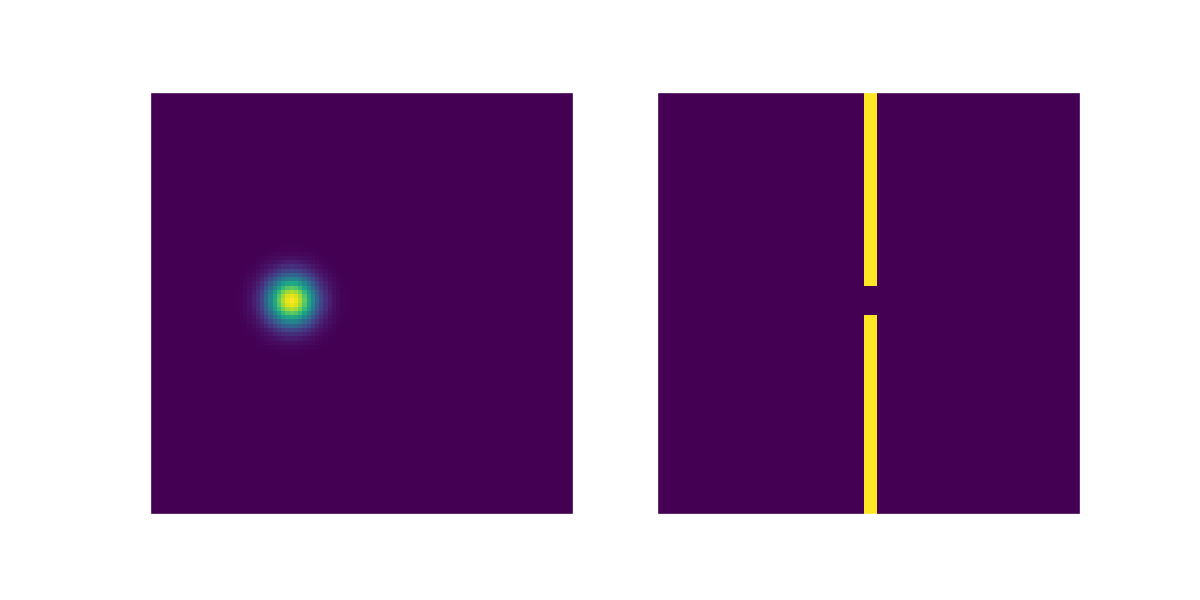

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background') # used for dark background

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(np.abs(psi).T, origin='lower')
ax[0].set_title("Initial Wave Function")
ax[1].imshow(V.T, origin='lower')
ax[1].set_title("Potential")

plt.show()

# 四、配置 IP

导入 overlay 并查看 IP 名称

In [3]:
from pynq import Overlay
overlay = Overlay("./tdse.bit")
for key in overlay.ip_dict: # 查看所有ip
    print(key)

tdse_0


查看寄存器及其地址：

In [4]:
tdse = overlay.tdse_0
tdse.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED=0),
  psi_re_1 = Register(psi_re=0),
  psi_re_2 = Register(psi_re=0),
  psi_im_1 = Register(psi_im=0),
  psi_im_2 = Register(psi_im=0),
  potential_1 = Register(potential=0),
  potential_2 = Register(potential=0),
  iter_num = Register(iter_num=0)
}

In [5]:
print(format(tdse.register_map.psi_re_1.address, 'x'))
print(format(tdse.register_map.psi_im_1.address, 'x'))
print(format(tdse.register_map.potential_1.address, 'x'))
print(format(tdse.register_map.iter_num.address, 'x'))

10
1c
28
34


分配缓冲区：

In [6]:
from pynq import allocate

shape = (100, 100)

buffer_re = allocate(shape=shape, dtype='f4')
buffer_im = allocate(shape=shape, dtype='f4')
buffer_po = allocate(shape=shape, dtype='f4')

np.copyto(buffer_re, psi_real) 
np.copyto(buffer_im, psi_imag)
np.copyto(buffer_po, V)

配置缓冲区地址：

In [7]:
tdse.write(0x10, buffer_re.physical_address)
tdse.write(0x1c, buffer_im.physical_address)
tdse.write(0x28, buffer_po.physical_address)
tdse.write(0x34, 500) # 500次循环

# 五、调用 IP

耗时：29.521045207977295 秒


<IPython.core.display.Javascript object>


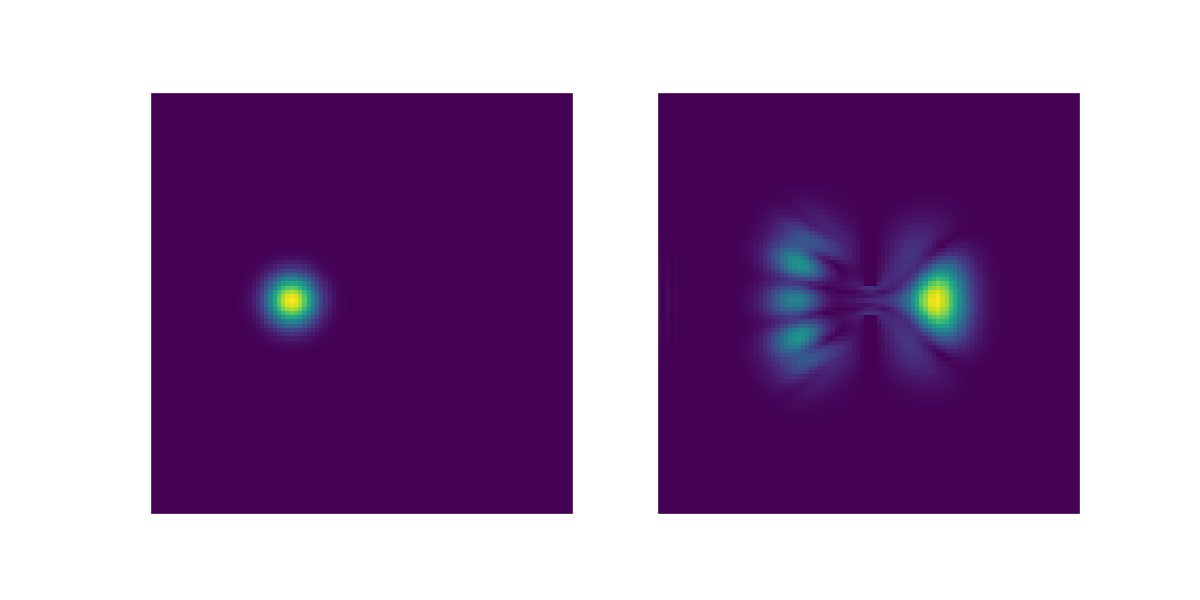

In [8]:
import time

# 向缓冲区拷贝数据
np.copyto(buffer_re, psi_real) 
np.copyto(buffer_im, psi_imag)
np.copyto(buffer_po, V)

# 调用 IP
tdse.write(0x00, 0x01)
st = time.time()
while tdse.read(0x00) == 1:
    pass
et = time.time()
print("耗时：{} 秒".format(et - st))

# 从缓冲区拷贝数据
psi_real_new = np.zeros(shape=shape, dtype='f4')
psi_imag_new = np.zeros(shape=shape, dtype='f4')
np.copyto(psi_real_new, buffer_re) 
np.copyto(psi_imag_new, buffer_im)

# 画图
psi_new = psi_real_new + psi_imag_new * 1j
psi_new_abs = np.abs(np.transpose(psi_new))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(psi_abs, origin='lower')
ax[0].set_title("Initial Wave Function")
ax[1].imshow(psi_new_abs, origin='lower')
ax[1].set_title("New Wave Function")

plt.show()

<IPython.core.display.Javascript object>


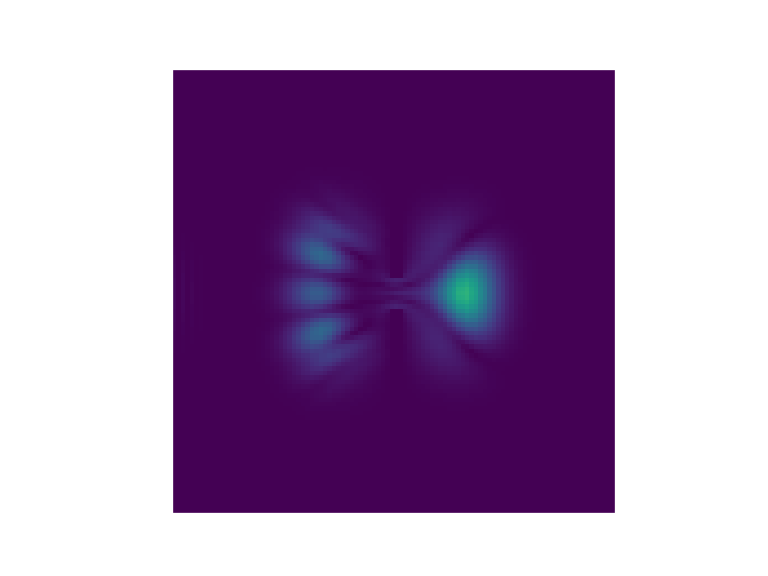

In [9]:
# 开启交互式窗口
%matplotlib notebook

import matplotlib.animation as animation

# 向缓冲区拷贝数据
np.copyto(buffer_re, psi_real) 
np.copyto(buffer_im, psi_imag)
np.copyto(buffer_po, np.real(V))

# 调用 IP
tdse.write(0x00, 0x01)

# 制作动画
fig = plt.figure()
im = plt.imshow(psi_abs, animated=True)
def updatefig(*args):
    np.copyto(psi_real_new, buffer_re) 
    np.copyto(psi_imag_new, buffer_im)

    psi_new = psi_real_new + psi_imag_new * 1j
    psi_new_abs = np.abs(np.transpose(psi_new))
    
    im.set_array(psi_new_abs)
    return im,
ani = animation.FuncAnimation(fig, updatefig, blit=True)
plt.show()

# 导出动画
ani.save('./animation.gif', writer='imagemagick', fps=10)

导出的动画为 `./animation.gif`

# 六、封装 IP

从本节开始可以重启内核。

最后进行 IP 的封装，驱动类代码如下：

In [10]:
from pynq import DefaultIP
from pynq import Overlay
from pynq import allocate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('dark_background')

class TDSEDriver(DefaultIP):
    bindto = ['xilinx.com:hls:tdse:1.0']
    
    def __init__(self, description):
        super().__init__(description=description)
        self._size = 100
        self.buffer_inre = allocate(shape=(self._size,self._size), dtype='f4')
        self.buffer_inim = allocate(shape=(self._size,self._size), dtype='f4')
        self.buffer_potential = allocate(shape=(self._size,self._size), dtype='f4')
        self.write(0x10, self.buffer_inre.physical_address)
        self.write(0x1c, self.buffer_inim.physical_address)
        self.write(0x28, self.buffer_potential.physical_address)
        
    def finished(self):
        return tdse.read(0x00) != 1

    def tdse(self, iter_num, inre=None, inim=None, potential=None, wait=False):
        if not self.finished():
            print("Warning: computation still running! Request cancelled.")
            return
        
        if (inre is None or inim is None or potential is None):
            if (inre is not None or inim is not None or potential is not None):
                print("Warning: Input Arguments not complete. Executing from buffer.")
        else:
            np.copyto(self.buffer_inre, inre)
            np.copyto(self.buffer_inim, inim)
            np.copyto(self.buffer_potential, potential)
            
        self.write(0x34, iter_num)
        
        self.write(0x00, 0x01)
        if wait:
            while self.read(0x00) != 0x04:
                pass

    def tdse_animate(self, fig=None, ax=None):
        if ax is None and fig is None:
            ax = plt.gca()
            fig = plt.gcf()
        else:
            ax = ax
            fig = fig

        psi_r = np.zeros(shape=(100,100), dtype='f4')
        psi_i = np.zeros(shape=(100,100), dtype='f4')
        np.copyto(psi_r, self.buffer_inre) 
        np.copyto(psi_i, self.buffer_inim)
        psi_abs = np.abs(psi_r + psi_i*1j).T

        im = ax.imshow(psi_abs, animated=True, origin='lower')
        def updatefig(*args):
            np.copyto(psi_r, self.buffer_inre) 
            np.copyto(psi_i, self.buffer_inim)

            psi_abs = np.abs(np.transpose(psi_r + psi_i*1j))

            im.set_array(psi_abs)
            return im,

        ani = animation.FuncAnimation(fig, updatefig, blit=True)
        return fig, ax, ani

    # gaussian wavepacket
    @staticmethod
    def _gaussian_wp(k_i, k_j, sigma_i, sigma_j, i0, j0, i, j):
        return np.exp(1j*k_i*i)*np.exp(1j*k_j*j)*np.exp(-((i-i0)**2/(2*sigma_i**2))-((j-j0)**2/(2*sigma_j**2))) / np.sqrt(np.pi*sigma_i*sigma_j)
    
    @classmethod
    def gaussian_wp(cls, k_i, k_j, sigma_i, sigma_j, i0, j0):
        psi_tmp = np.zeros(shape=(100,100), dtype=complex)
        for i in range(100):
            for j in range(100):
                psi_tmp[i,j] = cls._gaussian_wp(k_i, k_j, sigma_i, sigma_j, i0, j0, i, j)
        return psi_tmp
    
    @staticmethod
    # barrier potential
    def _barrier_x(thickness, aperture, height, i, j):
        gridnum_x = 100
        gridnum_y = 100
        val = 0
        if (i > np.floor(gridnum_x / 2 - thickness / 2)) and (i < np.floor(gridnum_x / 2 + thickness / 2)):    
            if (j > np.floor(gridnum_y / 2 + aperture / 2)) or (j < np.floor(gridnum_y / 2 - aperture / 2)):
                val = height
        return val
    
    @classmethod
    def barrier_x(cls, thickness, aperture, height):
        v_tmp = np.zeros(shape=(100,100), dtype=float)
        for i in range(100):
            for j in range(100):
                v_tmp[i,j] = cls._barrier_x(thickness, aperture, height, i, j)
        return v_tmp

## 6.1 下载比特流

In [11]:
overlay = Overlay('./tdse.bit')
tdse = overlay.tdse_0

## 6.2 调用 API

### 6.2.1 初始化输入的波函数

<IPython.core.display.Javascript object>


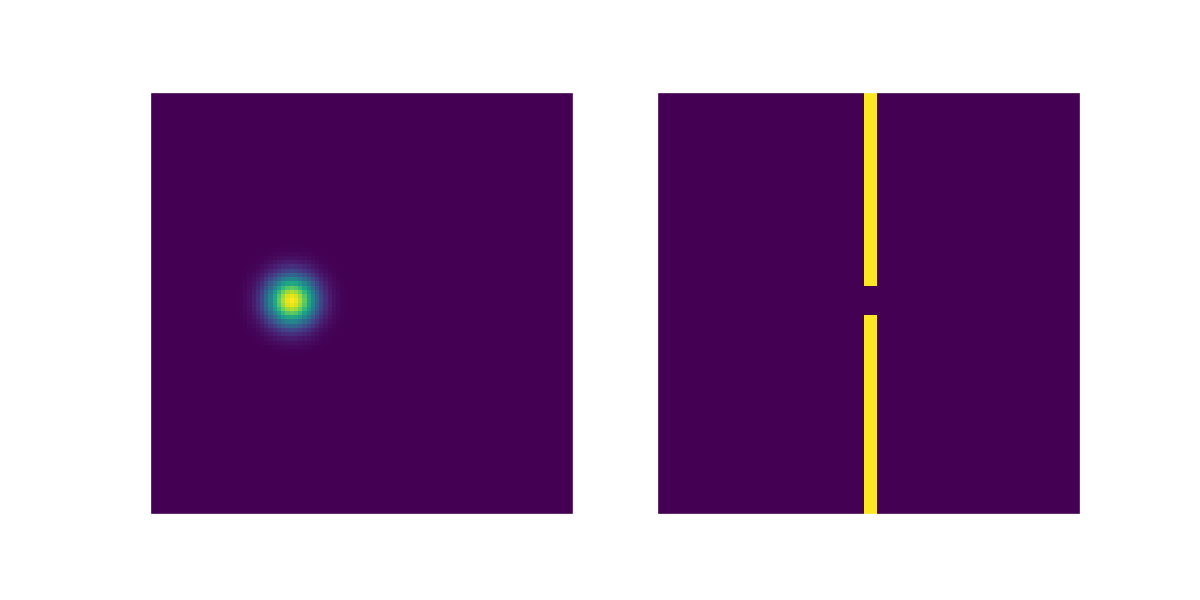

In [12]:
# 初始化波函数
psi = tdse.gaussian_wp(np.pi/2, 0, 4, 4, 33, 50)
psi_real = np.real(psi)
psi_imag = np.imag(psi)

# 初始化势能
V = tdse.barrier_x(4, 6, 1000)

# 查看波函数和势能函数
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(np.abs(psi).T, origin='lower')
ax[1].imshow(V.T, origin='lower')
plt.show()

### 6.2.2 求解 TDSE 并制作动画 

<IPython.core.display.Javascript object>


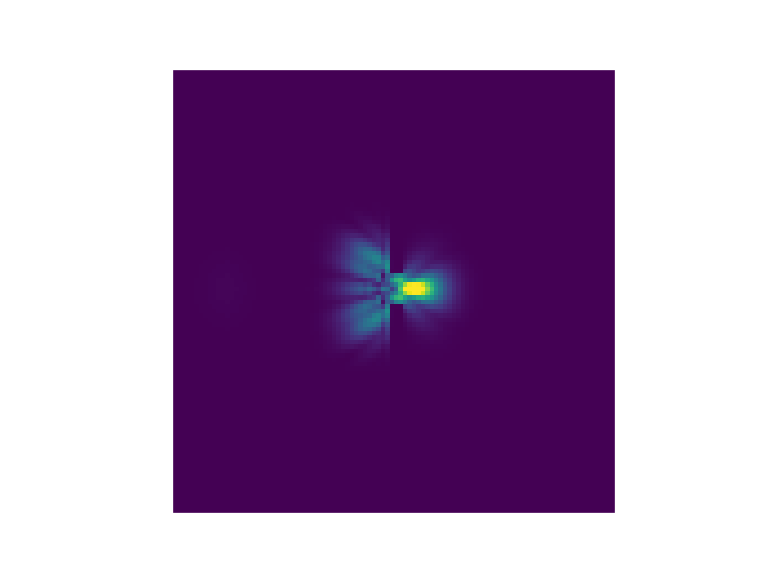

In [13]:
%matplotlib notebook

tdse.tdse(500, inre=psi_real, inim=psi_imag, potential=V)
fig, ax, ani = tdse.tdse_animate()

plt.show()